In [45]:
import os
import cv2
import json
import torch
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime
from ultralytics import YOLO
from pprint import pprint

# load model
model = YOLO("/home/marcos/projetos/pymice/proj-pymice_web/pymice-react/backend/temp/models/yolov11s_pose.pt")
model.to("cuda")

paths = [os.path.join("/home/marcos/projetos/pymice/videos/mice_jumping_videos", i) for i in os.listdir("/home/marcos/projetos/pymice/videos/mice_jumping_videos")]

1920 1080


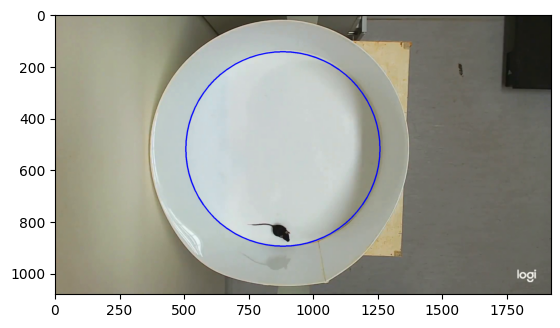

: 

In [ ]:
cap = cv2.VideoCapture(paths[0])

n = int(cap.get(cv2.CAP_PROP_FRAME_COUNT) * 1/2)
cap.set(cv2.CAP_PROP_POS_FRAMES, n)

width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
print(width, height)

ret, frame = cap.read()
# while True:

#     if not ret:
#         break

cv2.circle(frame, (width//2 - 80, height//2 - 20), 375, (255, 0, 0), 3)

cv2.imshow('window', frame)

#     if cv2.wait/Key(1) & 0xff==27:
#         break


frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.imshow(frame)
cap.release()

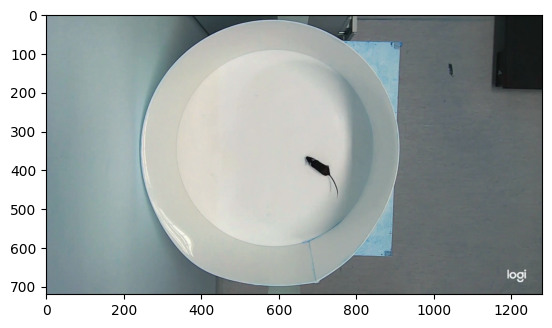

In [32]:
frame = cv2.imread('test.jpg')

plt.imshow(frame)


0: 384x640 1 mice, 9.1ms
Speed: 1.3ms preprocess, 9.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


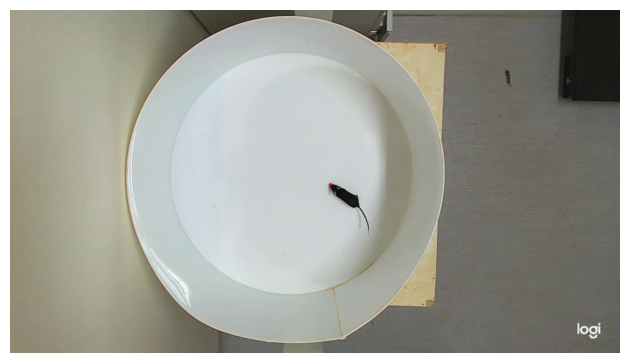

In [ ]:
result = model(frame)
keypoints = result[0].keypoints.data.cpu().numpy()
# pprint(keypoints)
kpts = keypoints[0]

visible_kpts = kpts[:, 2]#kpts[kpts[:, 2] > 0.5]

keypoints_data = [{"x": float(kpt[0]), "y": float(kpt[1]), "conf": float(kpt[2])} for kpt in kpts if kpt[2] > 0.3]

# print(keypoints_data)


for keypoint in keypoints_data:
    x, y = keypoint['x'], keypoint['y']
    # print(x, y)

cv2.circle(frame, (int(keypoints_data[0]['x']), int(keypoints_data[0]['y'])), 3, (0, 0, 255), -1)

frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.axis(False)
plt.grid()
plt.tight_layout()
plt.imshow(frame)
cap.release()